In [92]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

from sklearn.model_selection import RandomizedSearchCV 

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from Regression_score import Calculation

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("cardekho_updated.csv")
df

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,6.5 Lakh*,NaN,2017,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
19970,Maruti Ertiga BSIV VXI,9.25 Lakh*,NaN,2019,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
19971,Skoda Rapid 1.5 TDI Elegance,4.25 Lakh*,NaN,2015,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
19972,Mahindra XUV500 W6 2WD,12.25 Lakh*,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

full_name                0
selling_price            0
new_price            10410
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                160
engine                 110
max_power              337
seats                   87
dtype: int64

In [7]:
df["full_name"].nunique()

3321

In [8]:
df["seller_type"].nunique()

3

In [9]:
df["owner_type"].nunique()

1

In [10]:
df["fuel_type"].nunique()

5

In [11]:
df["transmission_type"].nunique()

2

In [12]:
df["seats"].unique()

array(['Seats5', 'Seats7', 'Seats8', 'Seats4', 'Seats6', nan, 'Seats2',
       'Seats9', 'Seats10', 'Seats14'], dtype=object)

In [13]:
def clean_sp(column):
    l1=[]
    for i in df[column]:
        x = i.replace("Lakh","").replace("*","").replace(" ","").replace(",","").replace("Cr","")
        if float(x)>100:
            num = (float(x)/100000)
            l1.append(float(num))
        else:
            l1.append(float(x))
    new_price = np.array(l1)
    df[column]=new_price
clean_sp("selling_price")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19974 non-null  object 
 1   selling_price      19974 non-null  float64
 2   new_price          9564 non-null   object 
 3   year               19974 non-null  int64  
 4   seller_type        19974 non-null  object 
 5   km_driven          19974 non-null  object 
 6   owner_type         19974 non-null  object 
 7   fuel_type          19974 non-null  object 
 8   transmission_type  19974 non-null  object 
 9   mileage            19814 non-null  object 
 10  engine             19864 non-null  object 
 11  max_power          19637 non-null  object 
 12  seats              19887 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 2.0+ MB


In [15]:
df.drop("new_price",axis=1,inplace=True)

In [16]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [86]:
df["seller_type"].replace({"Individual":1,"Dealer":2,"Trustmark Dealer":3},inplace=True)

In [18]:
def km_clean(column):
    l= []
    for i in df[column]:
        new = i.replace(",","").replace("kms","")
        l.append(int(new))
    new_array = np.array(l)
    df[column] = new_array
km_clean("km_driven")

In [19]:
df.drop("owner_type",axis=1,inplace=True)

In [20]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [21]:
df["fuel_type"].replace({'Petrol':1, 'Diesel':2, 'CNG':3, 'LPG':4, 'Electric':5},inplace=True)

In [22]:
df["transmission_type"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
df["transmission_type"].replace({'Manual':1, 'Automatic':2},inplace=True)

In [24]:
df["seats"].replace({'Seats5':5, 'Seats7':7, 'Seats8':8, 'Seats4':4, 'Seats6':6,'Seats2':2,
       'Seats9':9, 'Seats10':10, 'Seats14':14},inplace=True)

In [25]:
median = df["seats"].mean()
median

5.319806909036053

In [26]:
df["seats"].fillna(median,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19974 non-null  object 
 1   selling_price      19974 non-null  float64
 2   year               19974 non-null  int64  
 3   seller_type        19974 non-null  int64  
 4   km_driven          19974 non-null  int32  
 5   fuel_type          19974 non-null  int64  
 6   transmission_type  19974 non-null  int64  
 7   mileage            19814 non-null  object 
 8   engine             19864 non-null  object 
 9   max_power          19637 non-null  object 
 10  seats              19974 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 1.6+ MB


In [28]:
def clean_mil(column):
    l1= []
    for i in df[column]:
        if type(i)==str:
            new = i.replace("Mileage","").replace("kmpl","").replace("km/kg","").replace("km/hr","")
            l1.append(float(new))
        else:
            l1.append(i)
    new = np.array(l1)
    df[column] = new
clean_mil("mileage")

In [29]:
df

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012,0,120000,1,1,19.70,Engine796 CC,Max Power46.3 bhp,5.0
1,Hyundai Grand i10 Asta,5.50,2016,0,20000,1,1,18.90,Engine1197 CC,Max Power82 bhp,5.0
2,Hyundai i20 Asta,2.15,2010,0,60000,1,1,17.00,Engine1197 CC,Max Power80 bhp,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012,0,37000,1,1,20.92,Engine998 CC,Max Power67.1 bhp,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015,1,30000,2,1,22.77,Engine1498 CC,Max Power98.59 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,6.50,2017,1,69480,2,1,23.59,Engine1364 CC,Max Power67.05 bhp,5.0
19970,Maruti Ertiga BSIV VXI,9.25,2019,1,18000,1,1,17.50,Engine1373 CC,Max Power91.1 bhp,7.0
19971,Skoda Rapid 1.5 TDI Elegance,4.25,2015,1,67000,2,1,21.14,Engine1498 CC,Max Power103.52 bhp,5.0
19972,Mahindra XUV500 W6 2WD,12.25,2016,1,3800000,2,1,16.00,Engine2179 CC,Max Power140 bhp,7.0


In [30]:
def clean_engine(column):
    l1= []
    for i in df[column]:
        if type(i)==str:
            new = i.replace("Engine","").replace("CC","")
            l1.append(float(new))
        else:
            l1.append(i)
    new = np.array(l1)
    df[column] = new
clean_engine("engine")


In [31]:
def clean_power(column):
    l1= []
    for i in df[column]:
        if type(i)==str:
            new = i.replace("Max Power","").replace("bhp","")
            l1.append(float(new))
        else:
            l1.append(i)
    new = np.array(l1)
    df[column] = new
clean_power("max_power")

In [32]:
df.isna().sum()

full_name              0
selling_price          0
year                   0
seller_type            0
km_driven              0
fuel_type              0
transmission_type      0
mileage              160
engine               110
max_power            337
seats                  0
dtype: int64

In [33]:
mig_med = df["mileage"].median()
engine_med = df["engine"].median()
power_med = df["max_power"].median()
power_med

86.8

In [34]:
mig_mean = df["mileage"].mean()
mig_mean
engine_mean = df["engine"].mean()
engine_mean
power_mean = df["max_power"].mean()
power_mean

99.448761776246

In [35]:
df["mileage"].fillna(mig_mean,inplace=True)
df["engine"].fillna(engine_mean,inplace=True)
df["max_power"].fillna(power_mean,inplace=True)

<AxesSubplot:>

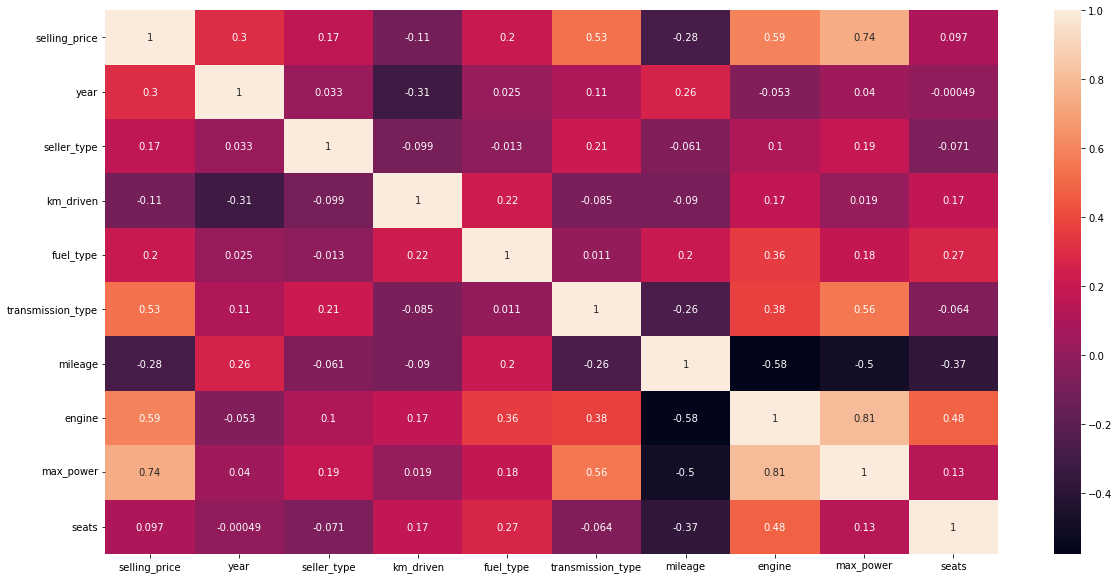

In [36]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(data = corr,annot=True)

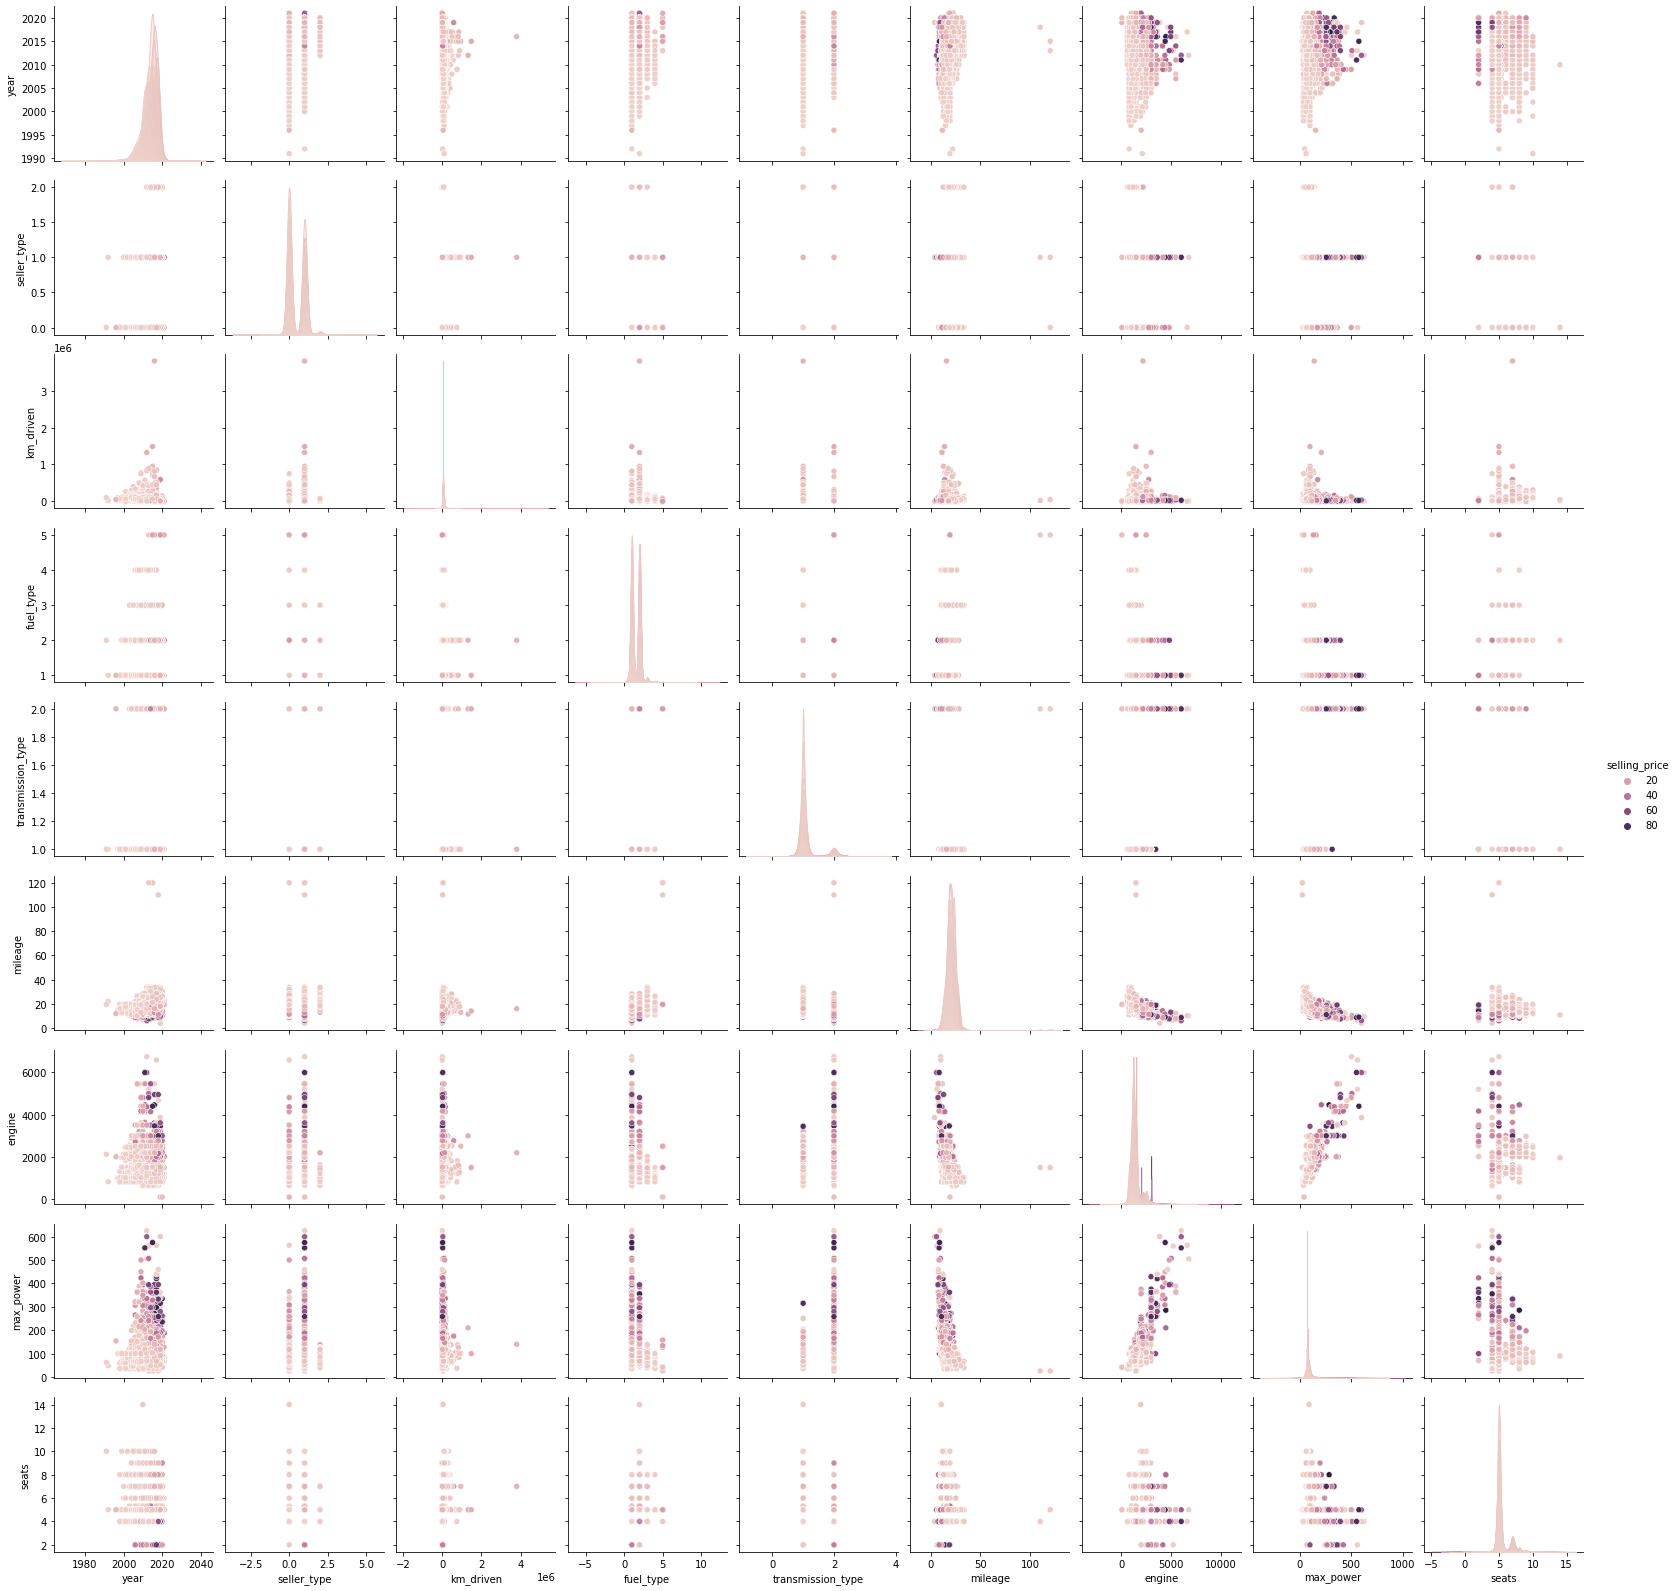

In [37]:
sns.pairplot(df,hue="selling_price")

In [38]:
df = df.drop("full_name",axis=1)
df

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,1.20,2012,0,120000,1,1,19.70,796.0,46.30,5.0
1,5.50,2016,0,20000,1,1,18.90,1197.0,82.00,5.0
2,2.15,2010,0,60000,1,1,17.00,1197.0,80.00,5.0
3,2.26,2012,0,37000,1,1,20.92,998.0,67.10,5.0
4,5.70,2015,1,30000,2,1,22.77,1498.0,98.59,5.0
...,...,...,...,...,...,...,...,...,...,...
19969,6.50,2017,1,69480,2,1,23.59,1364.0,67.05,5.0
19970,9.25,2019,1,18000,1,1,17.50,1373.0,91.10,7.0
19971,4.25,2015,1,67000,2,1,21.14,1498.0,103.52,5.0
19972,12.25,2016,1,3800000,2,1,16.00,2179.0,140.00,7.0


In [39]:
x= df.drop("selling_price",axis=1)
y= df["selling_price"]

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

## Linear Regression

In [41]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train,y_train)

LinearRegression()

In [42]:
score = Calculation(Lin_reg,x_train,x_test,y_train,y_test)
score.testing()

Testing data evalution
************************************************** 
mse:- 2.479994965606078 
************************************************** 
rmse:- 1.5747999763798823 
**************************************************  
mae :- 2.479994965606078 
**************************************************  
r2:- 0.6596229114355654 
************************************************** 


In [43]:
score.training()

Training data evalution
************************************************** 
mse:- 2.5596035043293 
************************************************** 
rmse:- 1.5998760903049023 
************************************************** 
mae :- 2.5596035043293  
************************************************** 
r2:- 0.6416496145246933 
**************************************************


## Decision Tree

In [44]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
dt_score = Calculation(model_dt,x_train,x_test,y_train,y_test)

In [46]:
dt_score.testing()

Testing data evalution
************************************************** 
mse:- 1.3139228744263662 
************************************************** 
rmse:- 1.1462647488370068 
**************************************************  
mae :- 1.3139228744263662 
**************************************************  
r2:- 0.8084214989596324 
************************************************** 


In [47]:
dt_score.training()

Training data evalution
************************************************** 
mse:- 0.045103783716127416 
************************************************** 
rmse:- 0.21237651404081248 
************************************************** 
mae :- 0.045103783716127416  
************************************************** 
r2:- 0.9994759290267068 
**************************************************


## DT with Hyperparameter Tunning

In [48]:
hyp_model = DecisionTreeRegressor(random_state=10)
hyper_para = ({'criterion':['squared_error', "absolute_error"],"max_depth":np.arange(1,10),
               'min_samples_split': np.arange(2,5),
               'min_samples_leaf': np.arange(2,10)})
rscv = RandomizedSearchCV(hyp_model,hyper_para,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4])})

In [49]:
dt_hyp_model = rscv.best_estimator_
dt_hyp_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=10)

In [50]:
plot_tree(dt_hyp_model,filled = True,feature_names= x.columns)
plt.show()

In [51]:
hyp_dt_score = Calculation(dt_hyp_model,x_train,x_test,y_train,y_test)

In [52]:
hyp_dt_score.testing()

Testing data evalution
************************************************** 
mse:- 1.4475035402871566 
************************************************** 
rmse:- 1.203122412843829 
**************************************************  
mae :- 1.4475035402871566 
**************************************************  
r2:- 0.8423353205500681 
************************************************** 


In [53]:
hyp_dt_score.training()

Training data evalution
************************************************** 
mse:- 1.3773233473503999 
************************************************** 
rmse:- 1.1735942004587445 
************************************************** 
mae :- 1.3773233473503999  
************************************************** 
r2:- 0.8756347792192938 
**************************************************


## RandomForest

In [54]:
rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [55]:
rf_score = Calculation(rf_model,x_train,x_test,y_train,y_test)

In [56]:
rf_score.testing()

Testing data evalution
************************************************** 
mse:- 1.0220815915360832 
************************************************** 
rmse:- 1.010980509968458 
**************************************************  
mae :- 1.0220815915360832 
**************************************************  
r2:- 0.8979095595852915 
************************************************** 


In [57]:
rf_score.training()

Training data evalution
************************************************** 
mse:- 0.41309804719215465 
************************************************** 
rmse:- 0.6427270394126535 
************************************************** 
mae :- 0.41309804719215465  
************************************************** 
r2:- 0.9840590056695959 
**************************************************


## Random Forest With Hyperparameter Tunning

In [58]:
rf_hyp_model = RandomForestRegressor(random_state=10)
hyp_para_rf = ({'n_estimators':np.arange(1,100),'criterion' : ['squared_error','absolute_error'],
    'max_depth':np.arange(1,20),
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf':np.arange(2,20),
    'max_features':['auto',"sqrt", "log2"]})
rscv_rf = RandomizedSearchCV(rf_hyp_model,hyp_para_rf,cv = 5)
rscv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45

In [59]:
rf_af_hyp = rscv_rf.best_estimator_
rf_af_hyp.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=11,
                      max_features='log2', min_samples_leaf=3,
                      min_samples_split=9, n_estimators=75, random_state=10)

In [60]:
rf_af_hyp_score = Calculation(rf_af_hyp,x_train,x_test,y_train,y_test)

In [61]:
rf_af_hyp_score.testing()

Testing data evalution
************************************************** 
mse:- 1.1126660052565707 
************************************************** 
rmse:- 1.0548298465897572 
**************************************************  
mae :- 1.1126660052565707 
**************************************************  
r2:- 0.8875956890636646 
************************************************** 


In [62]:
rf_af_hyp_score.training()

Training data evalution
************************************************** 
mse:- 0.9855805375138204 
************************************************** 
rmse:- 0.9927640895569402 
************************************************** 
mae :- 0.9855805375138204  
************************************************** 
r2:- 0.9181274447686074 
**************************************************


In [63]:
x.tail(1).T

,19973
year,2019.0
seller_type,1.0
km_driven,13000.0
fuel_type,1.0
transmission_type,2.0
mileage,18.0
engine,1497.0
max_power,117.6
seats,5.0


In [64]:
y.tail(1)

19973    12.0
Name: selling_price, dtype: float64

In [65]:
year = 2019
seller_type = 1
km_driven = 13000
fuel_type = 0
transmission_type =2
mileage = 18
engine = 1500
max_power =117.6
seats = 5

In [66]:
test_array = np.array([[year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats]])
test_array

array([[2.019e+03, 1.000e+00, 1.300e+04, 0.000e+00, 2.000e+00, 1.800e+01,
        1.500e+03, 1.176e+02, 5.000e+00]])

In [93]:
predict_cur_sp = rf_af_hyp.predict(test_array)[0]
predict_cur_sp

11.628400000000003

In [94]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(rf_af_hyp,f)

In [95]:
project_data = {"columns":list(x.columns),"seller_type":{"Individual":1,"Dealer":2,"Trustmark Dealer":3},
                "fuel_type" :{'Petrol':1, 'Diesel':2, 'CNG':3, 'LPG':4, 'Electric':5},
               "transmission_type" :{'Manual':1, 'Automatic':2},
               "seats" : {'Seats5':5, 'Seats7':7, 'Seats8':8, 'Seats4':4, 'Seats6':6,'Seats2':2,'Seats9':9, 
               'Seats10':10, 'Seats14':14}}

In [96]:
import json
with open ("project_data.json","w") as f:
    json.dump(project_data,f)